<a href="https://colab.research.google.com/github/HimajaAmbati/Learning-Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression from scratch



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [22]:
df=pd.read_csv("/content/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
X=df.drop('price',axis=1)
Y=df['price']

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
nf=X_train_scaled.shape[1] #no.of features
w=np.zeros(nf)             #weights
b=0                        #bias
lr=0.01                    #learning rate
epochs=1000
m=len(X_train_scaled)
for i in range(epochs):
  y_pred=np.dot(X_train_scaled,w)+b  #y=wx+b
  dw=(-2/m)*np.dot(X_train_scaled.T,(Y_train-y_pred))
  db=(-2/m)*np.sum(Y_train-y_pred)
  w=w-lr*dw
  b=b-lr*db

  if i%100==0:
    mse=np.mean((y_pred-Y_train)**2) #measn squared error
    print(f"Epoch {i}: Mean Squared Error = {mse:.2f}")

y_pred=np.dot(X_test_scaled,w)+b
mse=np.mean((y_pred-Y_test)**2)
print(f"Mean Squared Error on test set = {mse:.2f}")


Epoch 0: Mean Squared Error = 479076500362.73
Epoch 100: Mean Squared Error = 8180502384.79
Epoch 200: Mean Squared Error = 1596465798.67
Epoch 300: Mean Squared Error = 1428149556.30
Epoch 400: Mean Squared Error = 1376506124.26
Epoch 500: Mean Squared Error = 1329566409.36
Epoch 600: Mean Squared Error = 1284822858.36
Epoch 700: Mean Squared Error = 1242003973.91
Epoch 800: Mean Squared Error = 1200975235.14
Epoch 900: Mean Squared Error = 1161637610.33
Mean Squared Error on test set = 806714147529.59


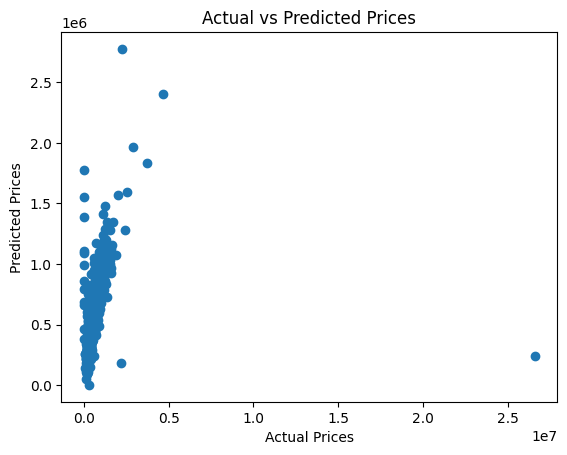

In [29]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

Linear regression using inbuilt


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [31]:
model=LinearRegression()
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [32]:
y_pred_lib = model.predict(X_test_scaled)
mse_lib = mse(Y_test, y_pred_lib)
print(f"\nTest MSE (Library): {mse_lib:.2f}")


Test MSE (Library): 1172294703250.17


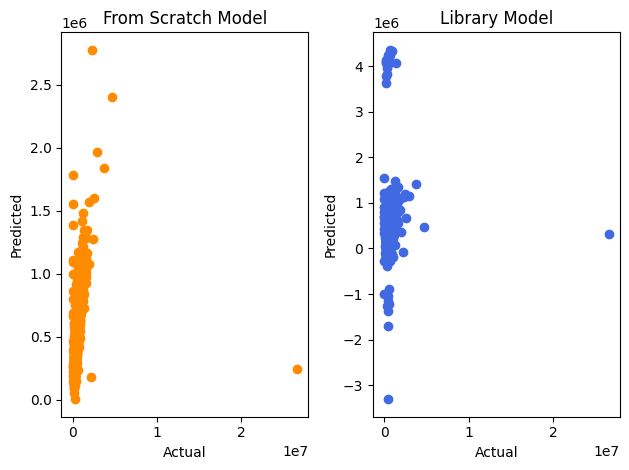

In [33]:
plt.subplot(1,2,1)
plt.scatter(Y_test, y_pred, color='darkorange')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("From Scratch Model")

plt.subplot(1,2,2)
plt.scatter(Y_test, y_pred_lib, color='royalblue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Library Model")

plt.tight_layout()
plt.show()


Ridge regularization


In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # alpha = λ (regularization strength)
ridge_model.fit(X_train_scaled, Y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

Lasso Regularization

In [35]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, Y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

Elastic Net(L1+L2)

In [36]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, Y_train)

y_pred_elastic = elastic_model.predict(X_test_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+12, tolerance: 6.581e+10
  model = cd_fast.enet_coordinate_descent(


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
for name, model, y_pred in [
    ("Ridge", ridge_model, y_pred_ridge),
    ("Lasso", lasso_model, y_pred_lasso),
    ("ElasticNet", elastic_model, y_pred_elastic)
]:
    print(f"{name}: MSE = {mean_squared_error(Y_test, y_pred):.2f}, R² = {r2_score(Y_test, y_pred):.3f}")


Ridge: MSE = 922560068285.43, R² = -0.056
Lasso: MSE = 960249205884.05, R² = -0.099
ElasticNet: MSE = 836714154588.54, R² = 0.042
